In [31]:
##imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score



import warnings
warnings.filterwarnings("ignore")


In [32]:
def correlation_guidance(train,target):
    ''' 
    input train dataset and target string
    creates a correlation plot of the variables in the columns list (self defined) by class
    no return
    '''
    plt.figure(figsize=(30, 30))
    for i,col1 in enumerate(train.describe().columns.tolist()):
        plt.subplot(5,6,i+1)
        x=train[train[target]==0][col1].sample(len(train[train[target]==1]))
        y=train[train[target]==1][col1]
        plt.plot(x, y, "o",color="grey")
        m,b = np.polyfit(x,y,1)
        plt.plot(x,m*x+b,label=f"regression line - f(x)={round(m,3)}x+{round(b,1)}")
        plt.xlabel("No-Fraud")
        plt.ylabel("Yes-Fraud")
        plt.legend()
        plt.title(f"Fraud by {col1} value")
    plt.show()

In [33]:
def univariate_explore(df):
    ''' 
    takes in dataframe, and puts out a histogram of each category, binning relatively low
    '''
    plt.figure(figsize=(25, 5))
    for i, col in enumerate(df.columns.tolist()): # List of columns
        plot_number = i + 1 # i starts at 0, but plot nos should start at 1
        plt.subplot(1,len(df.columns.tolist()), plot_number) # Create subplot.
        plt.title(col) # Title with column name.
        df[col].hist(bins=10) # Display histogram for column.
        plt.ylabel("Count")
        plt.grid(False) # Hide gridlines.
    plt.show()
    plt.title("Boxplot of continous features") # Title with column name.
    df[df.describe().columns.tolist()].boxplot() # Display boxplot for column.
    plt.ylabel("Count")
    plt.grid(False) # Hide gridlines.

def plot_variable_pairs(df,num_vars):
    ''' 
    that accepts a dataframe and numerical variables as input and plots all of the 
    pairwise relationships along with the regression line for each pair.
    '''

    l=0
    plt.figure(figsize=(25, 25))
    for col1 in num_vars:
        for col2 in num_vars:
            if not num_vars.index(col2) >= num_vars.index(col1):
                l +=1
                x=df[col1]
                y=df[col2]

                plt.subplot(len(num_vars)-2,len(num_vars)-1,l)
                

                plt.plot(x, y, "o",color="grey")

                m,b = np.polyfit(x,y,1)
                plt.plot(x,m*x+b,label=f"regression line - f(x)={round(m,0)}x+{round(b,0)}")
                plt.xlabel(col1)
                plt.ylabel(col2)
                plt.legend()
                plt.title(f"{col2} value by {col1} value - {l}")
    plt.show()

    return

def get_outliers(df1, k):
   '''
    Given a series and a cutoff value, k (tukey value), returns the upper outliers for the series.
    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound (q3 + (k*iqr)) the observation is.
   '''
   df=df1.copy()
   for col in df.describe().columns:
      if not col.endswith('_outlier'):
         q1, q3 = df[col].quantile([.25, .75])
         iqr = q3 - q1
         upper_bound = q3 + k * iqr
         lower_bound = q1 - k * iqr
         #print(col)
         df[f"{col}_outlier"] = np.where((df[col] - upper_bound) > 0,(df[col] - upper_bound),
                                       np.where((df[col] - lower_bound)<0,(df[col] - lower_bound),0))

   outlier_cols = [col for col in df if col.endswith('_outlier')]
   for col in outlier_cols:
      #print('~~~\n' + col)
      data = df[col][df[col] > 0]
      #print(data.describe())

   return df,outlier_cols

In [34]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
df = pd.read_csv(url)
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


# Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

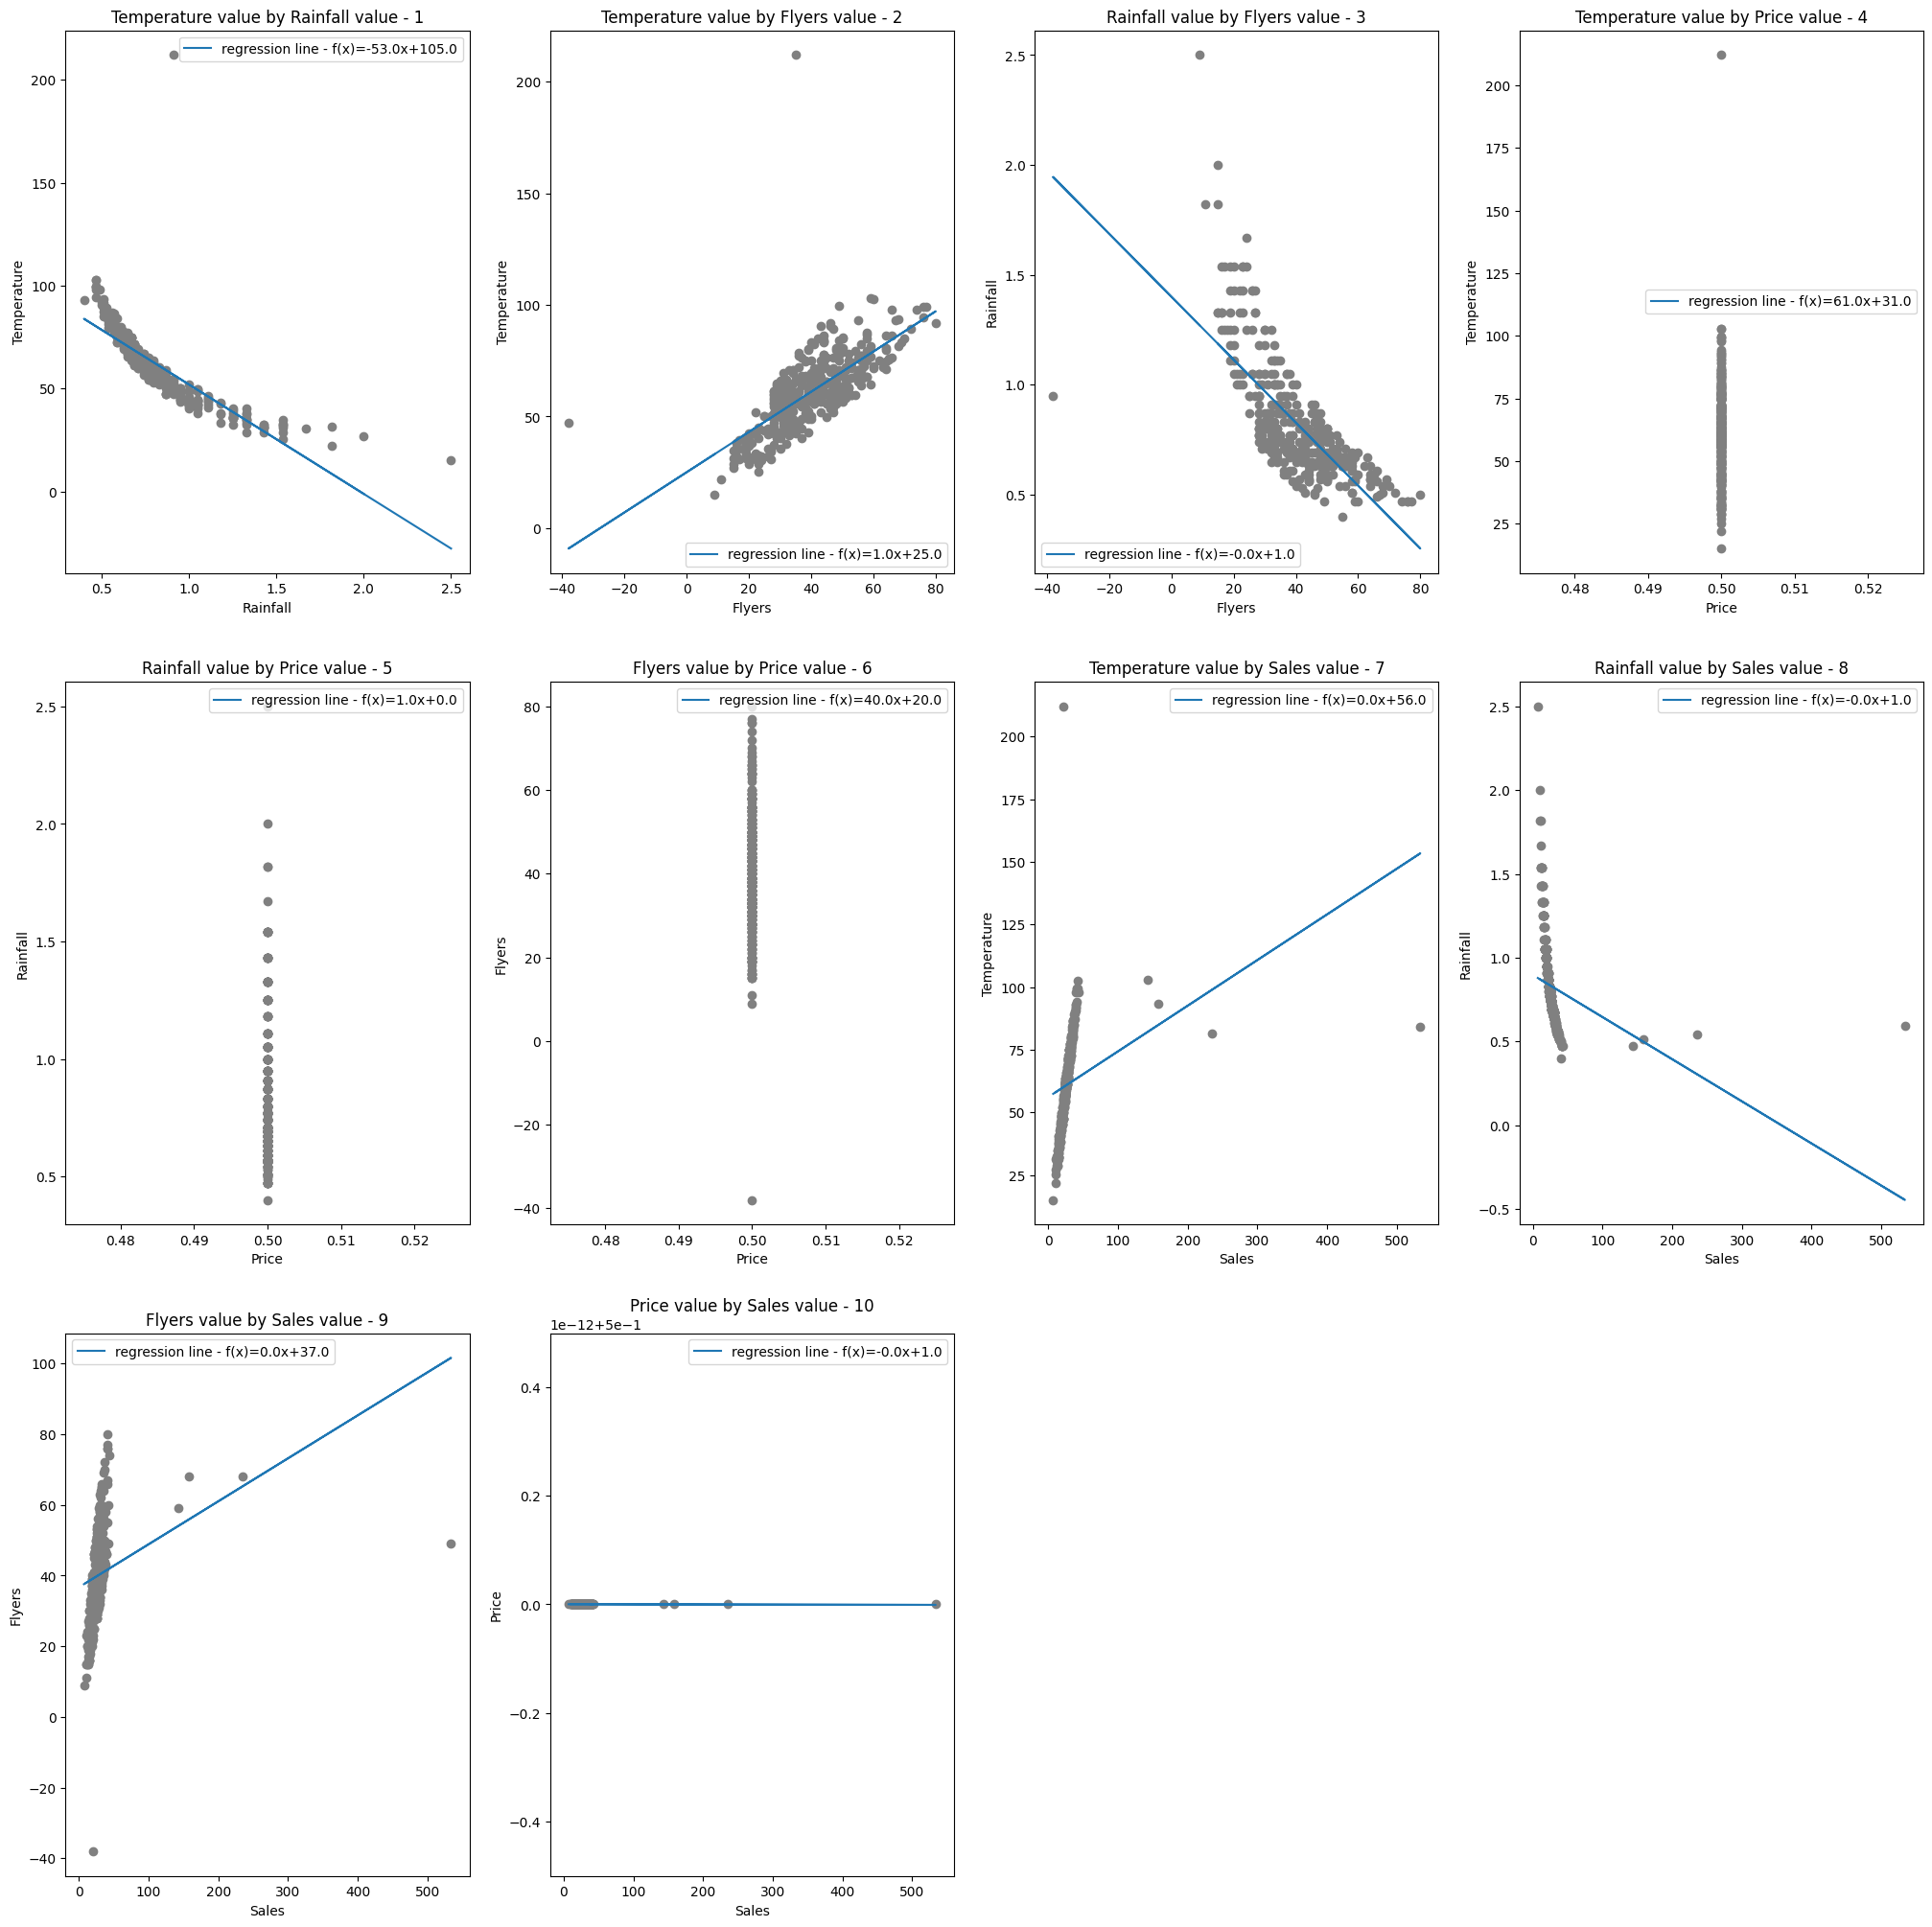

In [35]:
plot_variable_pairs(df,['Temperature','Rainfall','Flyers','Price','Sales'])

In [36]:
df1,out_list = get_outliers(df, k=1.5)
df1[df1[out_list].sum(axis=1) < 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outlier,Rainfall_outlier,Flyers_outlier,Price_outlier,Sales_outlier
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0.0,-42.0,0.0,0.0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-1.6,1.2,0.0,0.0,0.0


flyers looks to be an error, temperature is likely real  
drop flyers outlier

# Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [37]:
df1,out_list = get_outliers(df, k=1.5)
df1[df1[out_list].sum(axis=1) > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outlier,Rainfall_outlier,Flyers_outlier,Price_outlier,Sales_outlier
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0


outlier of 200 degrees is likely a typo, can drop or change to impute to similar around time frame  
rainfall is likely real  
price... price never changes  
sales could remove outliers if trying to predict typical sales, 534 is highly irregular  
Keep outliers: price and rainfall  
drop outliers: temperature, flyers, sales

# Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [38]:
df1,out_list = get_outliers(df, k=3)
df1[df1[out_list].sum(axis=1) < 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outlier,Rainfall_outlier,Flyers_outlier,Price_outlier,Sales_outlier
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0.0,-15.0,0.0,0.0


these outliers do not make sense, they should not be kept

# Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [39]:
df1,out_list = get_outliers(df, k=3)
df1[df1[out_list].sum(axis=1) > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outlier,Rainfall_outlier,Flyers_outlier,Price_outlier,Sales_outlier
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0.0,0.0,0.0
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,74.3,0.00,0.0,0.0,0.0
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.00,0.0,0.0,83.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.00,0.0,0.0,98.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.00,0.0,0.0,175.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.00,0.0,0.0,474.0
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,0.0,0.13,0.0,0.0,0.0
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,0.0,0.13,0.0,0.0,0.0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,0.0,0.81,0.0,0.0,0.0


temperature is likely erroneous  
rainfall could be real  
sales would definitely need to be investigated and likely would be dropped if doing any type of  prediction on it

# Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

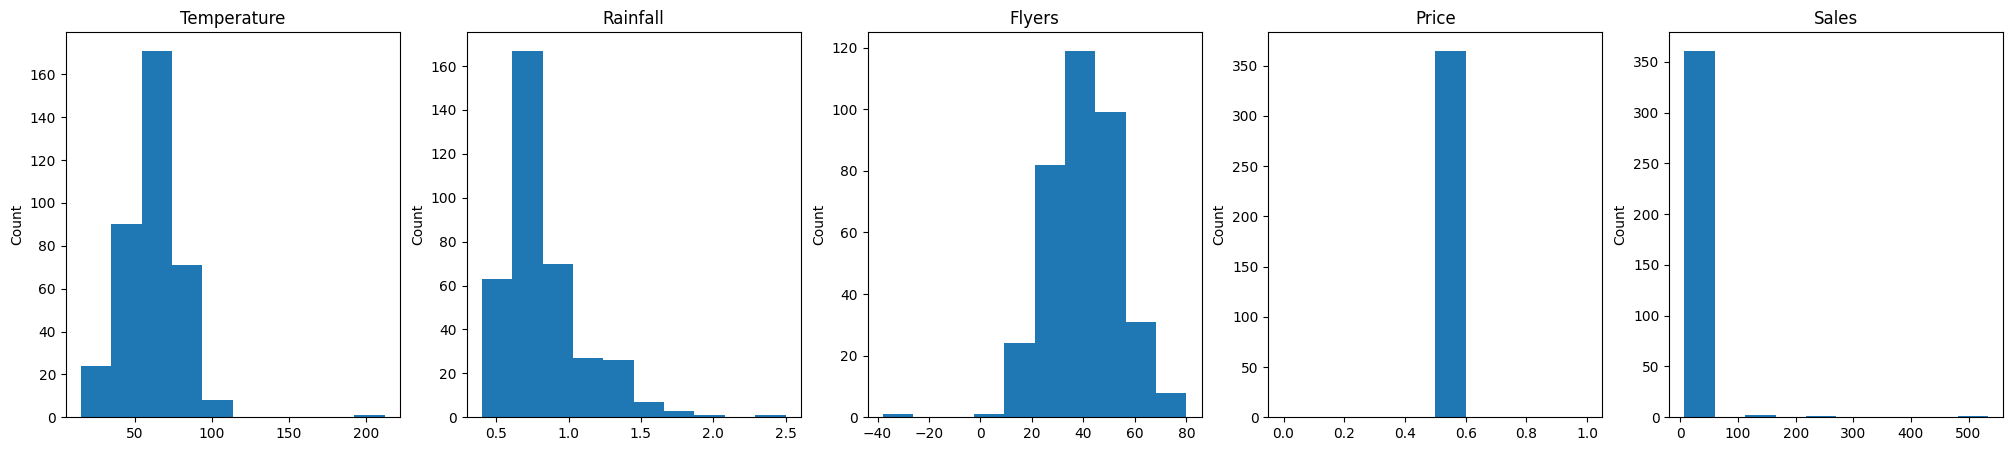

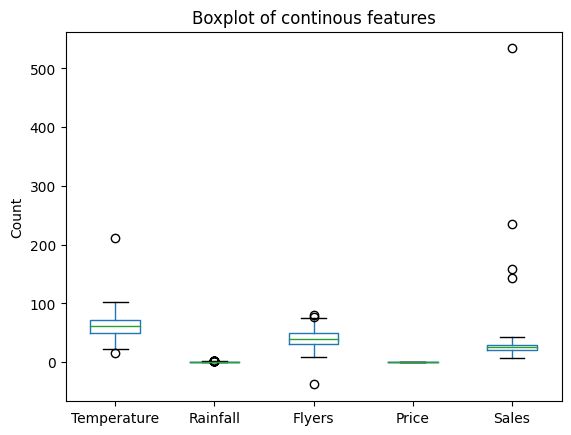

In [40]:
univariate_explore(df[df.describe().columns.tolist()])
df1 = df.copy()
twosig_list=[]
for col in ["Temperature","Rainfall","Flyers"]:
    df1[f"upper_2sig_{col}"] = np.where(df1[col] > df1[col].mean() + (2 * df1[col].std()),1,0)
    df1[f"lower_2sig_{col}"] = np.where(df1[col] < df1[col].mean() - (2 * df1[col].std()),1,0)
    twosig_list.append(f"upper_2sig_{col}")
    twosig_list.append(f"lower_2sig_{col}")



In [41]:
df1[df1[twosig_list].sum(axis=1) > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,upper_2sig_Temperature,lower_2sig_Temperature,upper_2sig_Rainfall,lower_2sig_Rainfall,upper_2sig_Flyers,lower_2sig_Flyers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0,0,1,0,0,0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0,0,1,0,0,0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0,0,1,0,0,0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0,0,1,0,0,0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0,0,1,0,0,0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0,0,1,0,0,0
19,1/20/17,Friday,31.6,1.43,20,0.5,12,0,0,1,0,0,0
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,0,0,1,0,0,0
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,1,0,0,0,0,0
166,6/16/17,Friday,99.3,0.47,77,0.5,41,1,0,0,0,1,0


Most of these do not make sense to remove, while they are relatively high (or low) most are still typical of the data

# Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [42]:
df1 = df.copy()
twosig_list=[]
for col in ["Temperature","Rainfall","Flyers"]:
    df1[f"upper_3sig_{col}"] = np.where(df1[col] > df1[col].mean() + (3 * df1[col].std()),1,0)
    df1[f"lower_3sig_{col}"] = np.where(df1[col] < df1[col].mean() - (3 * df1[col].std()),1,0)
    twosig_list.append(f"upper_3sig_{col}")
    twosig_list.append(f"lower_3sig_{col}")

df1[df1[twosig_list].sum(axis=1) > 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,upper_3sig_Temperature,lower_3sig_Temperature,upper_3sig_Rainfall,lower_3sig_Rainfall,upper_3sig_Flyers,lower_3sig_Flyers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0,0,1,0,0,0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0,0,1,0,0,0
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,1,0,0,0,0,0
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0,0,0,0,0,1
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,0,0,1,0,0,0
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,0,0,1,0,0,0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,0,0,1,0,0,0


Some of these do make sense to remove, the data seems to be pretty erroneous    
    - temperature, flyers

# Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

In [43]:
import env
# function to deal with parsing one entry in our log data
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'

df = pd.read_sql('SELECT * FROM api_access', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.head()
df0=df.copy()

In [44]:
df=df0.copy()

In [45]:
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

df = df.append(new)
df.tail()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
13973,97.105.19.58,17/Apr/2019 12:55:14,GET,/api/v1/sales?page=71,HTTP/1.1,200,510166,python-requests/2.21.0
0,95.31.18.119,21/Apr/2019 10:02:41,GET,/api/v1/items/,HTTP/1.1,200,1153005,python-requests/2.21.0
1,95.31.16.121,17/Apr/2019 19:36:41,GET,/api/v1/sales?page=79/,HTTP/1.1,301,1005,python-requests/2.21.0
2,97.105.15.120,18/Apr/2019 19:42:41,GET,/api/v1/sales?page=79/,HTTP/1.1,301,2560,python-requests/2.21.0
3,97.105.19.58,19/Apr/2019 19:42:41,GET,/api/v1/sales?page=79/,HTTP/1.1,200,2056327,python-requests/2.21.0


In [46]:
df['size_mb'] = df['size'] / 1024 / 1024
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')
df

,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb
timestamp,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396
2019-04-16 19:34:44,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472
2019-04-16 19:34:46,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377
2019-04-16 19:34:48,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246
...,...,...,...,...,...,...,...,...
2019-04-17 12:55:14,97.105.19.58,GET,/api/v1/sales?page=71,HTTP/1.1,200,510166,python-requests/2.21.0,0.486532
2019-04-21 10:02:41,95.31.18.119,GET,/api/v1/items/,HTTP/1.1,200,1153005,python-requests/2.21.0,1.099591
2019-04-17 19:36:41,95.31.16.121,GET,/api/v1/sales?page=79/,HTTP/1.1,301,1005,python-requests/2.21.0,0.000958


In [47]:
df.ip.value_counts(normalize=True).head()

97.105.19.58      0.858420
173.173.113.51    0.075762
72.181.113.170    0.043855
72.181.105.81     0.017599
68.201.219.223    0.001502
Name: ip, dtype: float64

In [48]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    ''' 
    takes a series (or dataframe feature) and returns a dataframe of the counts and percent of normalize (proba)
    '''
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [49]:
for i in df.columns:
    print(df[i].value_counts(normalize=True))

97.105.19.58      0.858420
173.173.113.51    0.075762
72.181.113.170    0.043855
72.181.105.81     0.017599
68.201.219.223    0.001502
24.26.242.9       0.001502
35.175.171.137    0.000143
52.87.230.102     0.000143
70.121.214.34     0.000143
52.90.165.200     0.000072
95.31.16.121      0.000072
95.31.18.119      0.000072
45.23.250.16      0.000072
52.91.30.150      0.000072
34.207.64.242     0.000072
3.88.129.158      0.000072
54.172.14.223     0.000072
3.92.201.136      0.000072
35.174.209.2      0.000072
54.145.52.184     0.000072
34.229.70.250     0.000072
97.105.15.120     0.000072
Name: ip, dtype: float64
GET    1.0
Name: request_method, dtype: float64
/api/v1/sales?page=2               0.050723
/api/v1/items                      0.033195
/api/v1/items?page=2               0.020818
/api/v1/items?page=3               0.015667
/api/v1/stores                     0.011590
                                     ...   
/api/v1                            0.000072
/api/v1//api/v1/items/nex

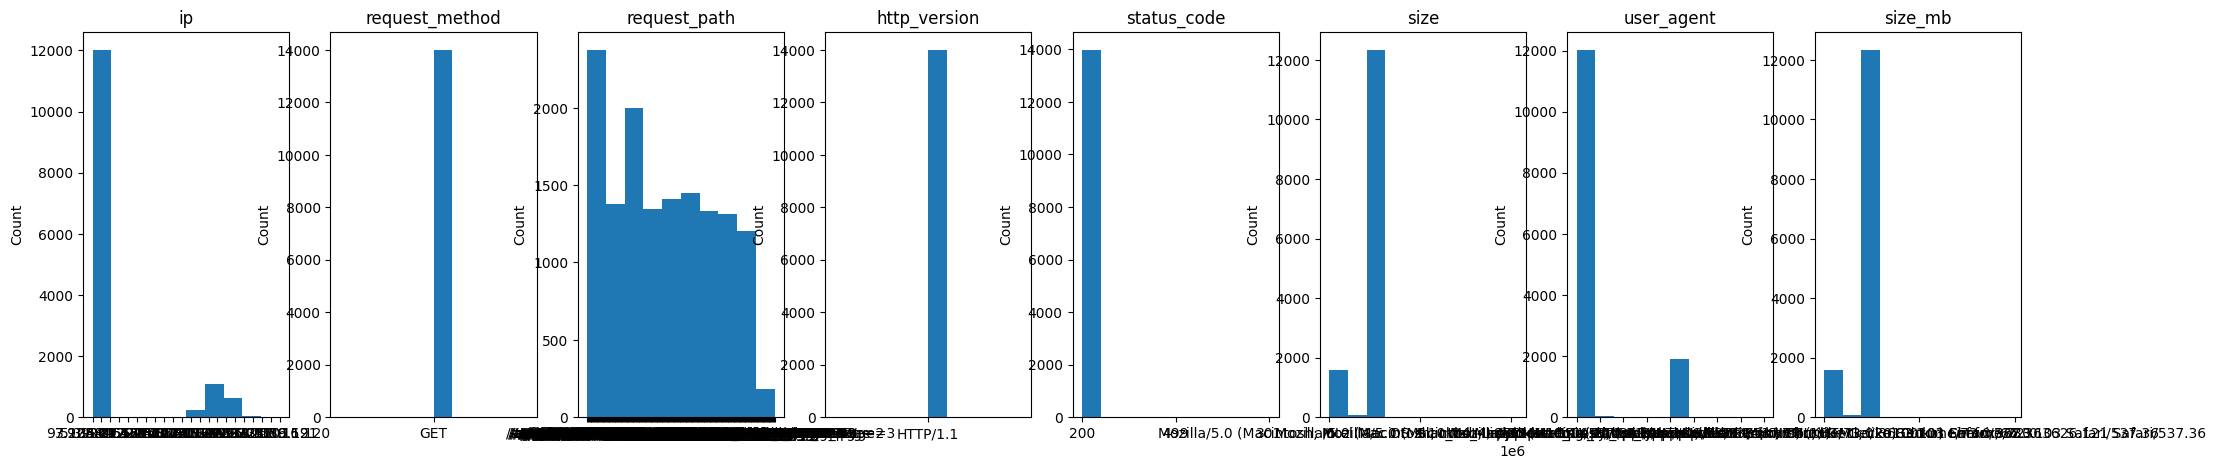

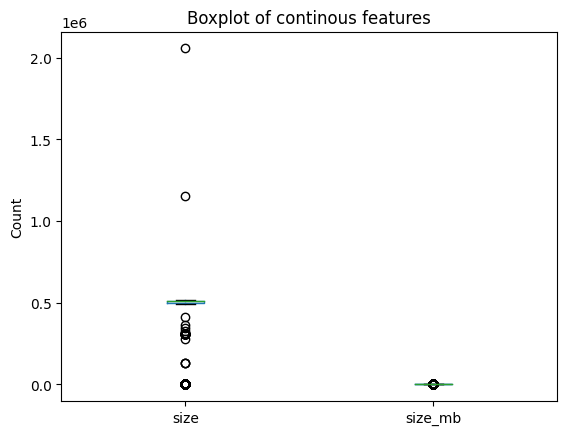

In [50]:
univariate_explore(df)

,count,proba
97.105.19.58,11999,0.858420
173.173.113.51,1059,0.075762
72.181.113.170,613,0.043855
72.181.105.81,246,0.017599
68.201.219.223,21,0.001502


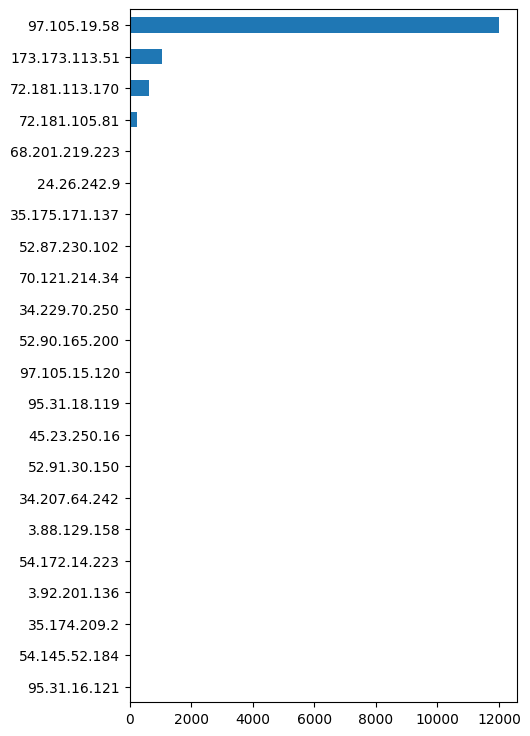

In [51]:
ip_df = value_counts_and_frequencies(df.ip)
ip_df['count'].sort_values().plot.barh(figsize=(5, 9))

ip_df.head()

In [52]:
status_given_ip = (
    df.groupby('ip')
    .status_code.value_counts(normalize=True)
    .rename('proba_status_given_ip')
    .reset_index()
)
status_given_ip

,ip,status_code,proba_status_given_ip
0,173.173.113.51,200,1.000000
1,24.26.242.9,200,1.000000
2,3.88.129.158,200,1.000000
3,3.92.201.136,200,1.000000
4,34.207.64.242,200,1.000000
5,34.229.70.250,200,1.000000
6,35.174.209.2,200,1.000000
7,35.175.171.137,200,1.000000
8,45.23.250.16,200,1.000000
9,52.87.230.102,200,1.000000


### If the probability of a status given the ip address is 100%, we know that that was the only status code seen by that ip address. To detect anomalies here we could look for two things:

 - Cases where the probability is < 100% -- this means that multiple different status codes were encountered from the given ip address  
 - Status codes other than 200. 200 is the most common response code in our dataset by far.

In [53]:
status_code_ip = df.groupby("ip")["status_code"].value_counts(normalize=True).rename("proba_status_code_ip").reset_index()
df[(
    df.ip.isin(
        status_code_ip[status_code_ip["proba_status_code_ip"]<1].ip.unique().tolist()
        )) & (
            df.status_code.isin(
                status_given_ip[status_given_ip["status_code"] \
                    != status_given_ip["status_code"].value_counts(normalize=True).\
                        index[0]]\
                    ["status_code"].unique().tolist()))]

,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb
timestamp,,,,,,,,
2019-04-16 19:55:15,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.20.1,0.0
2019-04-16 19:56:02,97.105.19.58,GET,/api/v1/sales?page=21,HTTP/1.1,499,0,python-requests/2.20.1,0.0
2019-04-16 20:28:46,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:33:24,97.105.19.58,GET,/api/v1/sales?page=29,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:38:13,97.105.19.58,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:38:55,97.105.19.58,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:39:00,97.105.19.58,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:45:17,97.105.19.58,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0,0.0
2019-04-16 20:45:28,97.105.19.58,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.21.0,0.0


In [54]:
status_given_ip[status_given_ip["status_code"] != status_given_ip["status_code"].value_counts(normalize=True).index[0]]
#df[df.ip == '97.105.15.120']

,ip,status_code,proba_status_given_ip
18,72.181.113.170,499,0.003263
19,95.31.16.121,301,1.000000
21,97.105.15.120,301,1.000000
23,97.105.19.58,499,0.001167


In [55]:
df = df.merge(status_code_ip,how="left",on=["ip","status_code"])

In [56]:
df.proba_status_code_ip.value_counts(normalize=True)

0.998833    0.857419
1.000000    0.097725
0.996737    0.043712
0.001167    0.001002
0.003263    0.000143
Name: proba_status_code_ip, dtype: float64

In [57]:
df.proba_status_code_ip.value_counts()

0.998833    11985
1.000000     1366
0.996737      611
0.001167       14
0.003263        2
Name: proba_status_code_ip, dtype: int64

In [58]:
#df[11] = df.loc[:,11:].appy(lambda rows: " ".join(rows.values.astype("str")),axis=1).str.replace("None","").str.strip()

 # Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

In [59]:
def discrete_lower_outliers_by_tukey_or_percentile(df:pd.DataFrame, tukey_k=3, percentile_pop=.05):
    ''' 
    input dataframe, tukey_k value, and percentile_pop
    creates a dictionary key of each feature and tests which method (tukey or percentile) results in more observations and uses that to determine key:list pair of outliers
    returns outliers
    example use-case after: df[df[col].isin(outliers[col])] or you can use df[df[list(outliers)[0]].isin(outliers[list(outliers)[0]])] if moving away from function
    '''

    outliers = {}
    for col in df.columns:
        if df[col].nunique() < 2:
            print(f"only one value found in {col}, moving to next feature")
        else:
            if len((df[col].value_counts()[(df[col].value_counts() <= (df[col].value_counts().quantile(.25) - np.diff(df[col].value_counts().quantile([.25,.75]))*tukey_k)[0])].index.tolist())) \
                        > len(df[col].value_counts()[df[col].value_counts() <= df[col].value_counts().quantile(percentile_pop)].index.tolist()):
                print(f"using tukey for {col}")
                outliers.update({col: (df[col].value_counts() <= (df[col].value_counts().quantile(.25) - np.diff(df[col].value_counts().quantile([.25,.75]))*tukey_k)[0])[(df[col].value_counts() <= (df[col].value_counts().quantile(.25) - np.diff(df[col].value_counts().quantile([.25,.75]))*tukey_k)[0])].index.tolist()})
            else:
                print(f"using percentile for {col}")
                outliers.update({col: df[col].value_counts()[df[col].value_counts() <= df[col].value_counts().quantile(percentile_pop)].index.tolist()})


    return outliers

In [60]:
outliers = discrete_lower_outliers_by_tukey_or_percentile(df,3,.05)
outliers.keys()

using percentile for ip
only one value found in request_method, moving to next feature
using tukey for request_path
only one value found in http_version, moving to next feature
using percentile for status_code
using tukey for size
using percentile for user_agent
using tukey for size_mb
using percentile for proba_status_code_ip


dict_keys(['ip', 'request_path', 'status_code', 'size', 'user_agent', 'size_mb', 'proba_status_code_ip'])

In [61]:
for each in outliers.keys():
    print((outliers[each]))

['52.90.165.200', '95.31.16.121', '95.31.18.119', '45.23.250.16', '52.91.30.150', '34.207.64.242', '3.88.129.158', '54.172.14.223', '3.92.201.136', '35.174.209.2', '54.145.52.184', '34.229.70.250', '97.105.15.120']
['/favicon.ico', '/api/v1//api/v1/items?page=2', '/api/v1/items/api/v1/items?page=2', '/api/v1/items/next_page', '/api/v1/stores?page=3', '/api/v1/', '/api/v1/sales?page=79/', '/api/v1/store', '/api/v1/sales/?page=2', '/api/v1/itemsitems', '/api/v1items', '/api/v1/stores?page=0', '/api/v1/stores?page=183', '/api/v1/stores?page=666', '/api/v1/items/', '/api/v1/items/api/v1/items?page=3', '/api/v1/items?page=4', '/api/v1/items&page=0', '/api/v1/stores?page=2', '/api/v1/items?page=99999999999999999998', '/api/v1/stores?page=999', '/api/v1/I_DIDNT_DO_IT!!!!', '/api/v1/helloclass!', '/api/v1', '/api/v1//api/v1/items/next_page', '/api/v1//api/v1/items', '/api/v1/items?page=0', '/api/V1/HiZach!']
['301']
[0, 48, 130921, 409449, 2560, 1005, 1153005, 126, 343913, 360297, 327529, 2783

In [62]:
df[df[list(outliers)[0]].isin(outliers[list(outliers)[0]])]

,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb,proba_status_code_ip
223,3.92.201.136,GET,/,HTTP/1.1,200,42,Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),0.000040,1.0
224,52.90.165.200,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.0
318,3.88.129.158,GET,/api/v1/items,HTTP/1.1,200,3561,Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),0.003396,1.0
320,34.207.64.242,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.0
324,54.172.14.223,GET,/api/v1/,HTTP/1.1,200,162,Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),0.000154,1.0
325,34.229.70.250,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.0
7829,54.145.52.184,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.0
8830,35.174.209.2,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.0
12440,52.91.30.150,GET,/,HTTP/1.1,200,42,Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),0.000040,1.0
13903,45.23.250.16,GET,/api/v1/stores,HTTP/1.1,200,1328,python-requests/2.21.0,0.001266,1.0


In [63]:
df[df[list(outliers)[1]].isin(outliers[list(outliers)[1]])]

,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb,proba_status_code_ip
116,97.105.19.58,GET,/api/v1/items?page=99999999999999999998,HTTP/1.1,200,48,python-requests/2.21.0,0.000046,0.998833
173,97.105.19.58,GET,/api/V1/HiZach!,HTTP/1.1,200,162,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko)...",0.000154,0.998833
174,97.105.19.58,GET,/favicon.ico,HTTP/1.1,200,162,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko)...",0.000154,0.998833
204,97.105.19.58,GET,/api/v1/items/next_page,HTTP/1.1,200,162,python-requests/2.21.0,0.000154,0.998833
221,97.105.19.58,GET,/api/v1/stores?page=666,HTTP/1.1,200,1328,python-requests/2.21.0,0.001266,0.998833
224,52.90.165.200,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.000000
320,34.207.64.242,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.000000
324,54.172.14.223,GET,/api/v1/,HTTP/1.1,200,162,Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),0.000154,1.000000
325,34.229.70.250,GET,/favicon.ico,HTTP/1.1,200,162,Slackbot 1.0 (+https://api.slack.com/robots),0.000154,1.000000
375,97.105.19.58,GET,/api/v1/items/next_page,HTTP/1.1,200,162,python-requests/2.21.0,0.000154,0.998833


In [64]:
df[df[list(outliers)[2]].isin(outliers[list(outliers)[2]])]

,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb,proba_status_code_ip
13975,95.31.16.121,GET,/api/v1/sales?page=79/,HTTP/1.1,301,1005,python-requests/2.21.0,0.000958,1.0
13976,97.105.15.120,GET,/api/v1/sales?page=79/,HTTP/1.1,301,2560,python-requests/2.21.0,0.002441,1.0
